# Layer Solver Example

This function divides a structure into layers with x-y planes. It will only provide useful information if the structure components are separated in the z-direction.

**NOTE:** You must have pymatgen, ase, mpinterfaces, and Hetero2d python packages installed to use the LayerSolver.

Author: Sydney Olson

Maintainer: Tara M. Boland (tboland1@asu.edu)

In [2]:
# import python libraries
from pymatgen import Structure

from hetero2d.manipulate.layersolver import LayerSolver

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%matplotlib notebook

## Using LayerSolver

LayerSolver takes only pymatgen structure objects. You can use either ASE or pymatgen to read in a variety of structure files.  

In [3]:
Sample = LayerSolver(Structure.from_file("LayerSolver_CONTCAR"))

## LayerSolver Output

The output is a dictionary of lists with each key corresponding to a layer.

For each dictionary key the corresponding values are [average z-value of all layer sites, the layer sites, the unique chemical species] within the identified layer.

In [4]:
Sample['Layer1']

{'avg_z': -14.998620157290828,
 'sites': [PeriodicSite: Mo (4.0492, 2.5404, -14.9993) [0.4467, 0.1502, 0.7500],
  PeriodicSite: Mo (9.3337, 0.1016, -14.9993) [0.3041, 0.8646, 0.7500],
  PeriodicSite: Mo (2.6407, -0.5072, -14.9993) [0.0184, 0.2929, 0.7500],
  PeriodicSite: Mo (5.9871, -0.2031, -14.9985) [0.1612, 0.5788, 0.7499],
  PeriodicSite: Mo (5.4586, 5.5910, -14.9985) [0.8754, 0.0074, 0.7499],
  PeriodicSite: Mo (10.7407, 3.1516, -14.9985) [0.7326, 0.7216, 0.7499],
  PeriodicSite: Mo (7.3955, 2.8465, -14.9970) [0.5897, 0.4359, 0.7498]],
 'species': ['Mo'],
 'site_idx': [1, 3, 4, 2, 5, 6, 0],
 'wyckoffs': ['d', 'd', 'd', 'd', 'd', 'd', 'a']}

In [7]:
print('The average z-distance for Layer1 is {:0.2f} A given by index 0'.format(Sample['Layer1']['avg_z']))

The average z-distance for Layer1 is -15.00 A given by index 0


In [8]:
print('The sites which make up Layer1 are:\n',
      Sample['Layer1']['sites'])

The sites which make up Layer1 are:
 [PeriodicSite: Mo (4.0492, 2.5404, -14.9993) [0.4467, 0.1502, 0.7500], PeriodicSite: Mo (9.3337, 0.1016, -14.9993) [0.3041, 0.8646, 0.7500], PeriodicSite: Mo (2.6407, -0.5072, -14.9993) [0.0184, 0.2929, 0.7500], PeriodicSite: Mo (5.9871, -0.2031, -14.9985) [0.1612, 0.5788, 0.7499], PeriodicSite: Mo (5.4586, 5.5910, -14.9985) [0.8754, 0.0074, 0.7499], PeriodicSite: Mo (10.7407, 3.1516, -14.9985) [0.7326, 0.7216, 0.7499], PeriodicSite: Mo (7.3955, 2.8465, -14.9970) [0.5897, 0.4359, 0.7498]]


In [9]:
print('The unique species which make up Layer1 are:\n',
      Sample['Layer1']['species'])

The unique species which make up Layer1 are:
 ['Mo']


## Visualizing the Results

According to LayerSolver, this structure consists of 4 layers. We know that this is MoS2 on C. We can plot the sites to make
sure 4 layers is accurate and that the current cutoff (0.5 Angstroms) is reasonable.

<IPython.core.display.Javascript object>


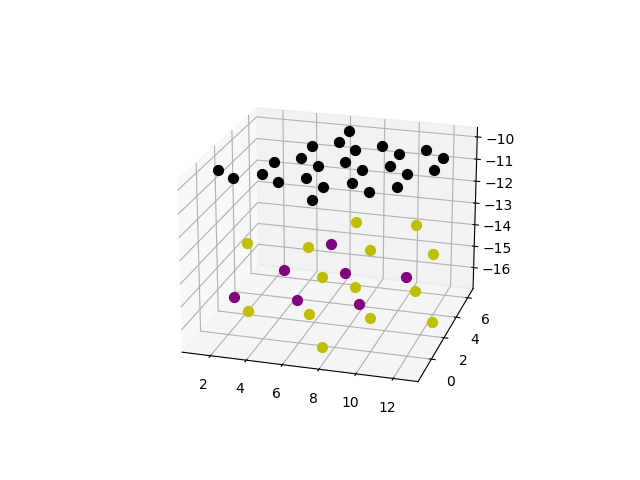

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in Structure.from_file("LayerSolver_CONTCAR").as_dict()['sites']:
    if i['label'] == 'C':
        i['SpeciesPlot'] = {'color':'k'}
    if i['label'] == 'Mo':
        i['SpeciesPlot'] = {'color':'purple'}
    if i['label'] == 'S':
        i['SpeciesPlot'] = {'color':'y'}
    ThreeDCheck = ax.scatter(i['xyz'][0], i['xyz'][1], 
        i['xyz'][2], s=50, color = i['SpeciesPlot']['color'])

The above plot may not work on certain systems.

The plot above confirms there are 4 layers of this structure. The cutoff will need to be tweaked when a minority value of atoms deviate from the rest of the aroms that it was originally part of before. Relaxations can be roughly as extreme as 0.5 Angstroms. 